result of 2a:
[1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
result of 2b:
[0, 0, 0, 1, 0, 0, 0]


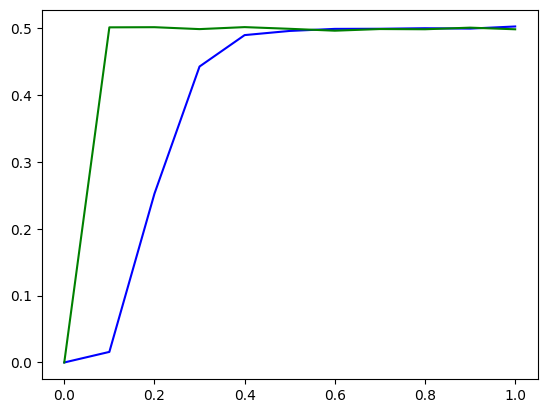

In [2]:
import numpy
import random
import matplotlib.pyplot as plt
def conv_enc(binary_data, impulse_response):
    R_num = len(impulse_response[0])-1
    cur_state = [0 for i in range(R_num)]
    out_num = len(impulse_response)
    c_out = []
    for bit in binary_data:
        cur_c = []
        for g in impulse_response:
            c_sum = g[0]*bit
            for i in range(R_num):
                if g[i+1] == 1:
                    c_sum += cur_state[i]
            if c_sum%2 == 1:
                cur_c.append(1)
            else:
                cur_c.append(0)
        c_out += cur_c
        temp = cur_state[0]
        for i in range(R_num):
            if i == 0:
                cur_state[0] = bit
            else:
                tempp = cur_state[i]
                cur_state[i] = temp
                temp = tempp
    return c_out

class node:
    def __init__(self):
        self.v = 0
        self.s = []
        self.activated = False
def hamming(a, b):
    h = 0
    for i in range(len(a)):
        if a[i] != b[i]:
            h+=1
    return h

def convolution(bit, x, impulse_response):
    R_num = len(impulse_response[0])-1
    out_num = len(impulse_response)
    c_out = []
    for g in impulse_response:
        val = x
        c_sum = bit*g[0]
        for i in range(R_num):
            last_bit = val%2
            c_sum += last_bit * g[R_num-i]
            val = int(val/2)
        if c_sum%2 == 1:
            c_out.append(1)
        else:
            c_out.append(0)
    return c_out

def conv_dec(binary_data, impulse_response):
    R_num = len(impulse_response[0])-1
    out_num = len(impulse_response)
    bit_len = int(len(binary_data)/out_num)
    x = int(2**(R_num))
    nodes = [[node() for i in range(x)] for j in range(bit_len+1)]
    nodes[0][0].activated = True
    for level in range(bit_len):
        cur_seq = binary_data[level*out_num:(level+1)*out_num]
#         print(cur_seq)
        for i in range(x):
            last_b = int((i*2)/x)
            prev1 = (i*2)%x
            prev2 = prev1 + 1
#             print(prev1)
            v1 = -1
            v2 = -1
            if nodes[level][prev1].activated:
                v1 = nodes[level][prev1].v + hamming(cur_seq, convolution(last_b, prev1, impulse_response))
            if nodes[level][prev2].activated:
                v2 = nodes[level][prev2].v + hamming(cur_seq, convolution(last_b, prev2, impulse_response))
            if v1 == -1:
                if v2 != -1:
                    nodes[level+1][i].v = v2
                    nodes[level+1][i].s.append(prev2)
                    nodes[level+1][i].activated = True
            else:
                if v2 == -1:
                    nodes[level+1][i].v = v1
                    nodes[level+1][i].s.append(prev1)
                    nodes[level+1][i].activated = True
                else:
#                     print(v1, v2)
                    if v1 > v2:
                        nodes[level+1][i].v = v2
                        nodes[level+1][i].s.append(prev2)
                        nodes[level+1][i].activated = True
                    elif v2 > v1:
                        nodes[level+1][i].v = v1
                        nodes[level+1][i].s.append(prev1)
                        nodes[level+1][i].activated = True
                    else:
                        nodes[level+1][i].v = v1
                        nodes[level+1][i].s.append(prev1)
                        nodes[level+1][i].s.append(prev2)
                        nodes[level+1][i].activated = True
    cur_level = bit_len
    cur_node = 0
    b_out = []
    while cur_level > 0:
        b = int(cur_node/(2**int(R_num-1)))
        temp = []
        temp.append(b)
        b_out = temp + b_out
        cur_node = nodes[cur_level][cur_node].s[0]
        cur_level -= 1
    return b_out
                        
b = [1,0,1,1,0]
impulse = [[1,0,0], [1,0,1], [1,1,1]]
data = conv_enc(b, impulse)
print("result of 2a:")
print(data)
d = [0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1,1,0,0,0]
print("result of 2b:")
data2 = conv_dec(d, impulse)
print(data2)

sequence = []
N = 100000
for i in range(N):
    sequence.append(int(random.random()+1/2))
data3 = conv_enc(sequence, impulse)
impulse2 = [[1,1,0],[1,0,1]]
data4 = conv_enc(sequence, impulse2)
# print(data3)

p_arr = []
err_arr = []
p2_arr = []
err2_arr = []
for i in range(11):
    data_err = data3
    p = i/10
    p_arr.append(p)
    p2_arr.append(p)
    for i in range(len(data3)):
        if random.random()<p:
            data_err[i] = (data3[i]+1)%2
    h = hamming(sequence, conv_dec(data_err, impulse))
    err_arr.append(h/N)
    data_err2 = data4
    for i in range(len(data4)):
        if random.random()<p:
            data_err2[i] = (data4[i]+1)%2
    h = hamming(sequence, conv_dec(data_err2, impulse2))
    err2_arr.append(h/N)
plt.plot(p_arr, err_arr, color="b")
plt.plot(p2_arr, err2_arr, color="g")
plt.show()